In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df = pd.read_csv('/content/drive/MyDrive/PRE_FINAL.csv')
df

,nouns,label
0,이어폰 음량 귀,6
1,독감 예방주사,2
2,목 음식물 계속 물감,6
3,케겔 운동,10
4,등 통증 문의,11
...,...,...
51129,병원 갑상선 조사,6
51130,비염,6
51131,비염,6
51132,귀지,6


In [3]:
df['nounlist'] = df['nouns'].str.split()
df.dropna(inplace=True)
df

,nouns,label,nounlist
0,이어폰 음량 귀,6,"[이어폰, 음량, 귀]"
1,독감 예방주사,2,"[독감, 예방주사]"
2,목 음식물 계속 물감,6,"[목, 음식물, 계속, 물감]"
3,케겔 운동,10,"[케겔, 운동]"
4,등 통증 문의,11,"[등, 통증, 문의]"
...,...,...,...
51129,병원 갑상선 조사,6,"[병원, 갑상선, 조사]"
51130,비염,6,[비염]
51131,비염,6,[비염]
51132,귀지,6,[귀지]


In [4]:
from sklearn.model_selection import train_test_split
x_train_, x_test_, y_train, y_test = train_test_split(
    df['nounlist'], df['label'],
    test_size=0.2, random_state=1234,
    stratify=df['label']
    )

x_train_.shape, x_test_.shape, y_train.shape, y_test.shape

((40676,), (10170,), (40676,), (10170,))

In [5]:
x_train_.head(10)

,nounlist
29504,"[아기, 피부염]"
6271,"[명치, 살짝, 우측, 위, 주먹]"
43078,"[앞니, 신경]"
30406,"[귀, 혹]"
27834,"[투명, 비문증]"
16306,"[양쪽, 어깨, 소리]"
41293,"[속, 새끼, 손가락]"
31794,"[피부질환, 질문]"
15494,"[머리, 개운, 띵, 해, 약, 개, 월간]"
303,"[물집, 고름, 물집]"


In [6]:
vocab_size = 15000
t = Tokenizer(num_words=vocab_size)
t.fit_on_texts(df['nounlist'])

t.word_index

{'통증': 1,
 '증상': 2,
 '피부': 3,
 '수술': 4,
 '눈': 5,
 '목': 6,
 '약': 7,
 '치료': 8,
 '머리': 9,
 '왼쪽': 10,
 '검사': 11,
 '복용': 12,
 '허리': 13,
 '운동': 14,
 '오른쪽': 15,
 '가슴': 16,
 '무릎': 17,
 '다리': 18,
 '두통': 19,
 '질문': 20,
 '여드름': 21,
 '부분': 22,
 '증': 23,
 '얼굴': 24,
 '몸': 25,
 '수': 26,
 '방법': 27,
 '코': 28,
 '심장': 29,
 '잠': 30,
 '어깨': 31,
 '점': 32,
 '근육': 33,
 '손': 34,
 '디스크': 35,
 '손가락': 36,
 '우울증': 37,
 '등': 38,
 '병원': 39,
 '살': 40,
 '문의': 41,
 '발목': 42,
 '스트레스': 43,
 '이상': 44,
 '염': 45,
 '주사': 46,
 '배': 47,
 '골절': 48,
 '소리': 49,
 '귀': 50,
 '신경': 51,
 '팔': 52,
 '요': 53,
 '발': 54,
 '뼈': 55,
 '염증': 56,
 '관절': 57,
 '술': 58,
 '부작용': 59,
 '부위': 60,
 '임신': 61,
 '위': 62,
 '이유': 63,
 '걸': 64,
 '피': 65,
 '허벅지': 66,
 '더': 67,
 '개월': 68,
 '진단': 69,
 '상담': 70,
 '힘': 71,
 '저림': 72,
 '종아리': 73,
 '탈모': 74,
 '걱정': 75,
 '제거': 76,
 '증후군': 77,
 '인대': 78,
 '아침': 79,
 '조금': 80,
 '숨': 81,
 '건가': 82,
 '혹': 83,
 '수치': 84,
 '턱': 85,
 '밑': 86,
 '흉터': 87,
 '발가락': 88,
 '사람': 89,
 '원인': 90,
 '안쪽': 91,
 '중': 92,
 '상처': 93,
 '엉덩

In [7]:
x_train = t.texts_to_sequences(x_train_)
x_train

[[171, 198],
 [217, 2327, 262, 62, 926],
 [950, 51],
 [50, 83],
 [2385, 402],
 [138, 31, 49],
 [272, 481, 36],
 [542, 20],
 [9, 7644, 2399, 271, 7, 139, 2082],
 [193, 523, 193],
 [275, 644, 161, 117, 8],
 [1930],
 [6, 35, 31, 1, 52, 512, 14],
 [2949],
 [459, 1, 20],
 [8705, 835, 7, 1340, 2625],
 [29, 64],
 [30, 96],
 [9, 387, 362, 316],
 [779, 437, 1266, 736],
 [221, 108],
 [4332, 14, 4332, 1654, 2887, 1746, 3472, 80, 443],
 [992, 3550],
 [24, 33],
 [31, 690],
 [6, 4790, 4791, 11, 4792],
 [221],
 [214, 2, 75],
 [153, 30, 7, 815],
 [432, 16, 6, 292],
 [99],
 [36, 2290, 93],
 [434, 7, 12],
 [88],
 [43, 276, 526],
 [15, 134, 91, 237, 278, 1],
 [17, 323, 5468, 912, 8008, 187],
 [16, 112, 80, 2],
 [933, 262, 506, 1],
 [650, 605],
 [1009, 496, 37, 7, 12, 466, 67],
 [886, 23],
 [18, 294, 220, 1],
 [2467, 181, 975],
 [754, 4, 557],
 [1059, 1779, 1204, 43, 1955, 146],
 [225, 419],
 [31, 1509, 49],
 [936, 14, 6, 5018],
 [864, 142, 96, 12],
 [2866, 311],
 [1150, 377, 21],
 [170, 3417, 32, 421, 55

In [8]:
sequence_length = 10
trunc_type = 'post'
padding_type = 'post'
padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, truncating=trunc_type, padding=padding_type, maxlen=sequence_length)
padded_x_train.shape

(40676, 10)

In [9]:
x_test = t.texts_to_sequences(x_test_)
padded_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, truncating=trunc_type, padding=padding_type, maxlen=sequence_length)
padded_x_test

array([[ 462,  317,    0, ...,    0,    0,    0],
       [  11,  223,  828, ...,    0,    0,    0],
       [  10,    6,   38, ...,    0,    0,    0],
       ...,
       [1402,  427,    0, ...,    0,    0,    0],
       [   5,  411,  520, ...,    0,    0,    0],
       [  68,  171, 1497, ...,    0,    0,    0]], dtype=int32)

In [10]:
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weight = {i : weight[i] for i in range(26)}

In [11]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [12]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train.shape

(40676, 26)

In [13]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

embedding_dim = 2048

model = keras.models.Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(LSTM(256)),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

import datetime
dt = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/my_board/" + dt
tc = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/model/LSTM_' + dt + '.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(padded_x_train, y_train,
                    batch_size=128, epochs=6,
                    callbacks=[mc, tc],
                    #class_weight=weight,
                    validation_data=(padded_x_test, y_test))

Epoch 1/6
317/318 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4283 - loss: 2.0575
Epoch 1: val_accuracy improved from -inf to 0.72153, saving model to /content/drive/MyDrive/model/LSTM_20250525-060608.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.4293 - loss: 2.0541 - val_accuracy: 0.7215 - val_loss: 1.0385
Epoch 2/6
317/318 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7785 - loss: 0.7919
Epoch 2: val_accuracy improved from 0.72153 to 0.73707, saving model to /content/drive/MyDrive/model/LSTM_20250525-060608.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 28s 87ms/step - accuracy: 0.7785 - loss: 0.7920 - val_accuracy: 0.7371 - val_loss: 0.9663
Epoch 3/6
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8307 - loss: 0.5857
Epoch 3: val_accuracy did not improve from 0.73707
318/318 ━━━━━━━━━━━━━━━━━━━━ 33s 63ms/step - accuracy: 0.8306 - loss: 0.5858 - val_accuracy: 0.7252 - val_loss: 1.0167
Epoch 4/6
317/318 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8572 - loss: 0.4751
Epoch 4: val_accuracy did not improve from 0.73707
318/318 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.8571 - loss: 0.4753 - val_accuracy: 0.7257 - val_loss: 1.0805
Epoch 5/6
317/318 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8720 - loss: 0.4094
Epoch 5: val_accuracy did not improve from 0.73707
318/318 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.8719 - loss: 0.4096 - val_accuracy: 0.7281 - val_loss: 1.1621
Epoch 6/6
317/318 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8918 - loss: 0.3449
Epoch 6: val_accuracy did n

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 10, 2048)       │    30,720,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 512)            │     4,720,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,824,656 (407.50 MB)

 Trainable params: 35,608,218 (135.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,216,438 (271.67 MB)

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/model/LSTM.h5')

In [17]:
class_to_label = {'DERM': 0, 'GS': 1, 'IP': 2, 'GI':3, 'OPH':4,
                'NR': 5, 'ENT': 6, 'PSY': 7, 'HEON': 8, 'RHEU': 9,
                'REHM': 10, 'NS': 11, 'AN': 12, 'DENT': 13, 'PS': 14,
                'CS': 15, 'INFC': 16, 'OS': 17,
                'EMR': 18, 'ENDO': 19, 'CA': 20, 'KTM': 21, 'OBGY': 22,
                'URO': 23, 'ALL': 24, 'NPH': 25}
label_to_koclass = {0:'피부과', 1:'외과', 2:'호흡기내과', 3:'소화기내과', 4:'안과',
                  5:'신경과', 6:'이비인후과', 7:'정신건강의학과', 8:'혈액종양내과', 9:'류마티스내과',
                  10:'재활의학과', 11:'신경외과', 12:'마취통증의학과', 13:'치과', 14:'성형외과',
                  15:'심장혈관흉부외과', 16:'감염내과', 17:'정형외과', 18:'응급의학과', 19:'내분비내과',
                  20:'순환기내과', 21:'한방과', 22:'산부인과', 23:'비뇨의학과', 24:'알레르기내과', 25:'신장내과'}

In [18]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 42.5 MB/s eta 0:00:00


In [19]:
from konlpy.tag import Okt
def preprocess_sentence(sentence):
    twitter = Okt()
    nouns = twitter.nouns(sentence)
    stopwords = ['질문', '문의', '관련', '그대로', '계속', '답변', '선생님', '관련문의',
            '한지', '자주', '좀', '쪽', '자꾸', '요즘', '몇개', '무조건', '하나요',
            '안해','요', '경우', '최근', '및', '몇', '달', '일반', '전날', '저번',
            '말', '일어나지', '며칠', '먹기', '지난번', '글', '때문', '너', '무',
            '오늘', '시', '잔', '뒤', '지속', '막', '것', '이건', '뭔가', '다시', '그',
                '무슨', '안', '난', '도', '기', '후', '거리', '이', '뭘', '저', '뭐', '답젼',
                '평생', '회복', '반', '감사', '의사', '보험', '학생', '제발', '살짝',
                '느낌', '제', '대해','갑자기','문제', '전','정도', '왜', '거', '가요',
                '의심', '어제', '추천', '를', '지금', '무엇', '내일', '관해', '리', '세',
                 '로', '목적', '그냥', '거의', '고민', '다음', '이틀', '항상', '뭐', '때',
                '요', '가끔', '이후', '혹시']
    for word in nouns:
        if word in stopwords:
            while word in nouns:
                nouns.remove(word)
    return nouns

def predict(sen):
    global model
    test = preprocess_sentence(sen)
    test_batch = []
    test_batch.append(test)
    pre_test = t.texts_to_sequences(test_batch)
    padded_pre_test = tf.keras.preprocessing.sequence.pad_sequences(pre_test, truncating=trunc_type, padding=padding_type, maxlen=sequence_length)

    result = model.predict(padded_pre_test)
    sorted = result.argsort()
    sp = result.argmax()
    val = result.max()
    base = '{0} 확률로 {1}를 방문하셔야 합니다.'
    return base.format(val, label_to_koclass[sp])

In [20]:
sentence = "코막힘 때문에 입으로 숨쉬다가 귀도 먹먹하고 두통까지 생겼어요"
predict(sentence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


'0.8811889886856079 확률로 이비인후과를 방문하셔야 합니다.'

In [21]:
sentence = "가슴이 답답하고 숨이 막혀요"
predict(sentence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'0.6229900121688843 확률로 순환기내과를 방문하셔야 합니다.'

In [22]:
sentence = "아침에 손가락과 발가락이 아프고 피곤해요"
predict(sentence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'0.4685128331184387 확률로 정형외과를 방문하셔야 합니다.'

In [23]:
sentence = "잠을 못자서 몽롱해요"
predict(sentence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'0.9848892688751221 확률로 정신건강의학과를 방문하셔야 합니다.'

In [24]:
import matplotlib.pyplot as plt

In [25]:
# 시각화
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

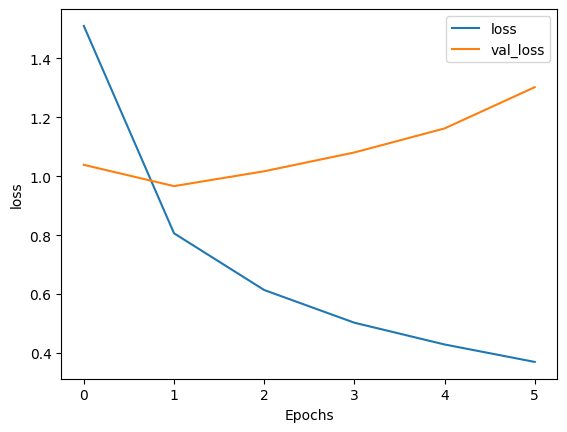

In [26]:
plot_graphs(history, 'loss')

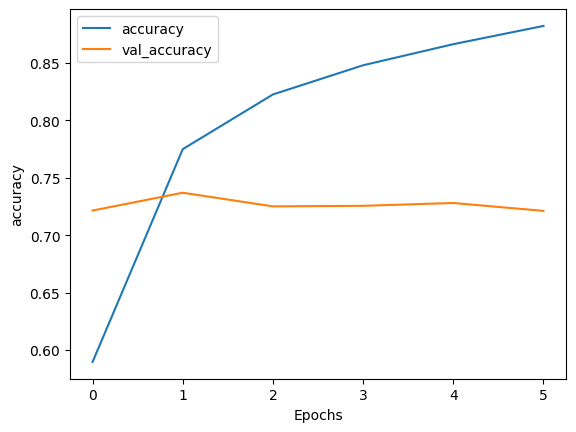

In [27]:
plot_graphs(history, 'accuracy')